In [16]:
import numpy as np
import random
from Data_import import data_frame
from model_evaluation import *
np.random.seed(1)
random.seed(1)

Data = data_frame()
calm_train = Data.calm_train
pilot_train = Data.pilot_semi_learning_generator(semi_ratio = 1)
train_x = np.vstack((calm_train, pilot_train))
train_y = np.hstack((np.zeros(calm_train.shape[0])+1, np.zeros(pilot_train.shape[0]) - 1))


In [17]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(random_state=1)
clf.fit(train_x, train_y)

Learning rate set to 0.004106
0:	learn: 0.6890300	total: 6.64ms	remaining: 6.64s
1:	learn: 0.6845601	total: 11.1ms	remaining: 5.55s
2:	learn: 0.6797699	total: 15.5ms	remaining: 5.16s
3:	learn: 0.6749511	total: 20.4ms	remaining: 5.08s
4:	learn: 0.6707975	total: 25.1ms	remaining: 4.99s
5:	learn: 0.6663517	total: 29.6ms	remaining: 4.9s
6:	learn: 0.6624602	total: 35.2ms	remaining: 4.99s
7:	learn: 0.6588912	total: 40ms	remaining: 4.96s
8:	learn: 0.6549771	total: 44.7ms	remaining: 4.92s
9:	learn: 0.6509609	total: 49.3ms	remaining: 4.88s
10:	learn: 0.6466331	total: 53.9ms	remaining: 4.85s
11:	learn: 0.6425935	total: 58ms	remaining: 4.78s
12:	learn: 0.6387760	total: 62.3ms	remaining: 4.73s
13:	learn: 0.6342514	total: 66.5ms	remaining: 4.69s
14:	learn: 0.6308660	total: 71ms	remaining: 4.66s
15:	learn: 0.6270401	total: 75.3ms	remaining: 4.63s
16:	learn: 0.6229201	total: 80ms	remaining: 4.63s
17:	learn: 0.6192684	total: 84.5ms	remaining: 4.61s
18:	learn: 0.6156069	total: 88.7ms	remaining: 4.58s
1

In [12]:
beta_imbalance = 1
calm_test_x = Data.calm_test_generator(calm_ratio=beta_imbalance)
test_x = np.vstack((calm_test_x, Data.pilot_test_v_r))
test_y = np.hstack((np.zeros(calm_test_x.shape[0])+1, np.zeros(Data.pilot_test_v_r.shape[0]) - 1))
test_predict = clf.predict_proba(test_x)[:, 1]
test_pred = clf.predict(test_x)

test_y_ordered = np.hstack((np.zeros(calm_test_x.shape[0]), np.zeros(Data.pilot_test_v_r.shape[0]) + 1))#[0,1]
test_predict_ordered = -test_predict

AUC, CSI = calculate_metrics(decision_values = test_predict, truth = test_y, hazard_id = 1)
print(AUC)

0.9294770408163265


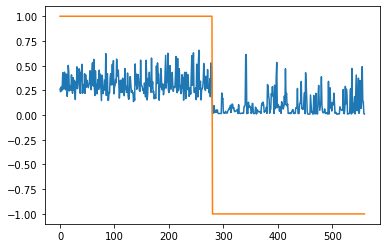

In [14]:
import matplotlib.pyplot as plt
plt.plot(test_predict)
plt.plot(test_y)

In [18]:
for count_imbalance, beta_imbalance in enumerate(np.array([1,10,100,200,400,600,800,1000])):
    calm_test_x = Data.calm_test_generator(calm_ratio=beta_imbalance)
    test_x = np.vstack((calm_test_x, Data.pilot_test_v_r))
    test_y = np.hstack((np.zeros(calm_test_x.shape[0])+1, np.zeros(Data.pilot_test_v_r.shape[0]) - 1))
    test_predict = clf.predict_proba(test_x)[:, 1]
    test_pred = clf.predict(test_x)
    test_y_ordered = np.hstack((np.zeros(calm_test_x.shape[0]), np.zeros(Data.pilot_test_v_r.shape[0]) + 1))#[0,1]
    test_predict_ordered = -test_predict
    AUC, _ = calculate_metrics(decision_values = test_predict_ordered, truth = test_y_ordered, hazard_id = 1)
    print(f"=====================beta_imbalance = {beta_imbalance}=====================")    
    print('AUC:',AUC)

=====================beta_imbalance = 1=====================
AUC: 0.9294770408163265
=====================beta_imbalance = 10=====================
AUC: 0.9257206632653062
=====================beta_imbalance = 100=====================
AUC: 0.9140702806122449
=====================beta_imbalance = 200=====================
AUC: 0.9020053571428572
=====================beta_imbalance = 400=====================
AUC: 0.8805443558673469
=====================beta_imbalance = 600=====================
AUC: 0.8611993835034013
=====================beta_imbalance = 800=====================
AUC: 0.8425479113520408
=====================beta_imbalance = 1000=====================
AUC: 0.8249923852040817


In [ ]:
CatB_AUC = [0.9294770408163265, 0.9257206632653062, 0.9140702806122449, 0.9020053571428572,
            0.8805443558673469, 0.8611993835034013, 0.8425479113520408, 0.8249923852040817]